![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large2.jpg"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: US Census Analysis

<i>
> Dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data <br>
> Dataset description: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
</i>

We will be working with an extraction of data done by Barry Becker from the 1994 Census database.

**[Dataset information and columns](Dataset Info.ipynb)**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 6)})

### Loading the Dataset

The data is located in the `data/census-data.csv` CSV file. Take a look at the structure of it and the fields it has. You will notice that **it doesn't have a header**. 

In [53]:
df = pd.read_csv('data/census-data.csv', sep=', ', engine='python', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We used a few special parameters to correctly parse the csv. As the header is missing, pandas is assigning numbers to the columns.

**This is when the fun starts...**
<br><br><br>

---

### Exercise: Rename the columns

Use the names contained in `col_names` to properly name the columns (and replace the numbers). 

In [54]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']
df.columns=col_names

Once everything works, it'll look something like this:

In [55]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exercise: Cleaning the data

You'll notice that some columns have invalid values (`workclass`, `occupation`, and `native-country`).

###### a. What are those invalid values?

Identify the invalid values of `workclass` (spoiler, it's a `?` question mark):

In [56]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [57]:
# Results

###### b. Removing those rows

Your task now is to remove those invalid rows (all the ones containing `?`). There are different ways of doing this, so this is entirely up to you. This is the expected output of your dataframe:

In [58]:
df.replace({
    'workclass': {'?':np.nan},
    'native-country': {'?':np.nan}
}, inplace=True)

In [59]:
df.drop(df[df['occupation'].str.contains('?', regex=False)].index, inplace=True)

In [60]:
# Result:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 15 columns):
age               30718 non-null int64
workclass         30718 non-null object
fnlwgt            30718 non-null int64
education         30718 non-null object
education-num     30718 non-null int64
marital-status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital-gain      30718 non-null int64
capital-loss      30718 non-null int64
hours-per-week    30718 non-null int64
native-country    30162 non-null object
income            30718 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [61]:
df.dropna(axis=0, how='any', inplace=True)

### Exercise: Convert `income` to an ordered categorical type

As you'll see, `income` has two values `<=50K` and `>50K`:

In [62]:
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

Your job is to turn them into an **ORDERED** categorical type with the following order: `['<=50K', '>50K']`

In [63]:
df['income'] = df['income'].astype('category', ordered=True)

In [64]:
# Expected result:
df['income'].dtype

CategoricalDtype(categories=['<=50K', '>50K'], ordered=True)

### Exercise: Create a dummy variable _">50K"_ or _"<=50K"_ and concatenate them to our dataframe.

In [65]:
df = df.join(pd.get_dummies(df['income']))

In [66]:
# Expected result:

### Exercise: Plot a **distplot** showing the distribution of `age`.

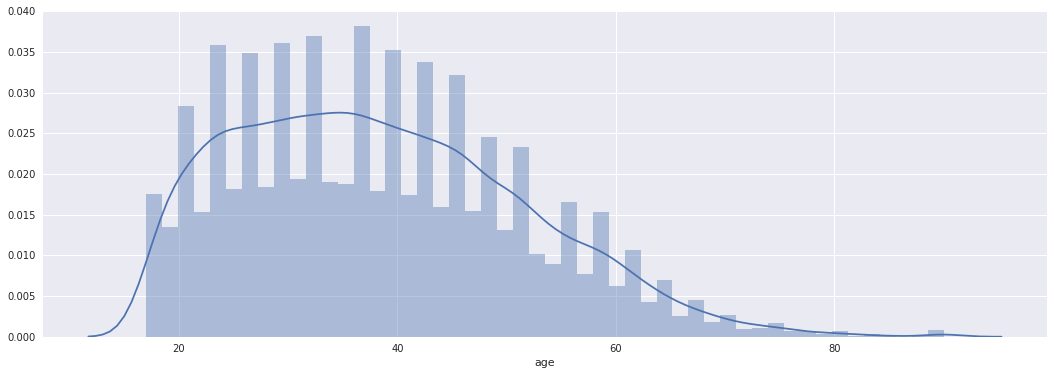

In [67]:
# Expected output
sns.distplot(df['age'])

### Exercise: Plot a **boxplot** showing the distribution of `age`.

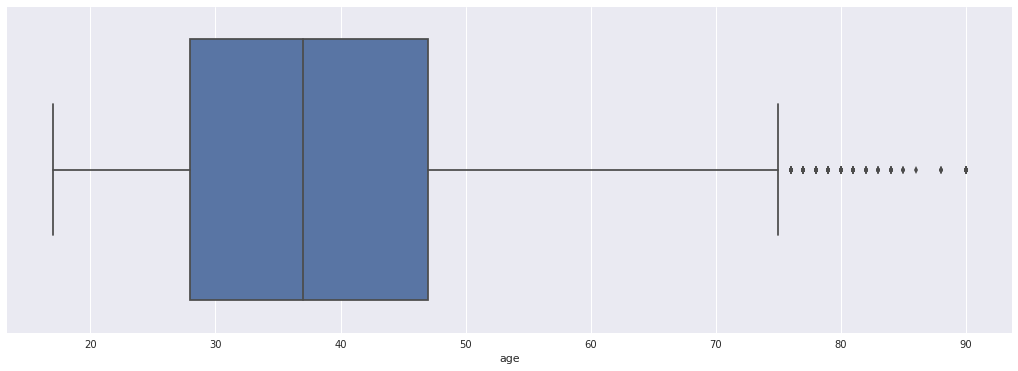

In [68]:
# Expected output
sns.boxplot(df['age'])

### Exercise: Remove outlier values from `age` and plot the previous boxplot again.

_Suppose values higher than 70 as outliers_.

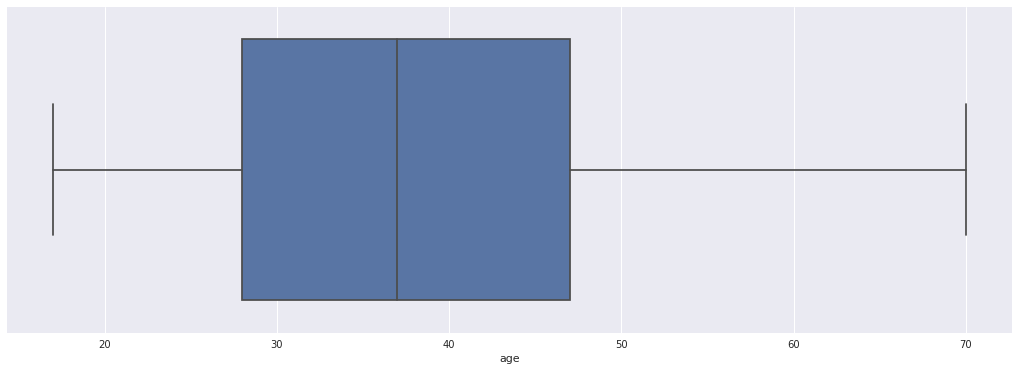

In [69]:
# Expected solution:
df = df[df['age']<= 70]
    
sns.boxplot(df['age'])

In [70]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,<=50K,>50K
count,29778.000000,2.977800e+04,29778.000000,29778.000000,29778.000000,29778.000000,29778.000000,29778.000000
mean,37.945497,1.900418e+05,10.131506,1077.663879,87.634025,41.086205,0.750353,0.249647
std,12.461905,1.058187e+05,2.534293,7351.445000,401.587807,11.839437,0.432816,0.432816
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.177462e+05,9.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.786150e+05,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,2.378718e+05,13.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,70.000000,1.484705e+06,16.000000,99999.000000,3900.000000,99.000000,1.000000,1.000000


### Exercise: How many people work more than 20 hours per week?

In [71]:
(df['hours-per-week']>20).describe()

count     29778
unique        2
top        True
freq      27553
Name: hours-per-week, dtype: object

In [72]:
df.loc[df['hours-per-week'] > 20, 'hours-per-week'].count()

27553

In [73]:
# Expected output

### Exercise: How many men and women are? Show totals and proportion over all the data.

In [74]:
men = (df['sex']=='Male').sum()
women = (df['sex']=='Female').sum()
men_p = men/(men+women)
women_p = women/(men+women)
print("""Male count: {}\nFemale count: {}\nMale proportion: {}\nFemale proportions: {}""".format(men, women, men_p, women_p))

Male count: 20123
Female count: 9655
Male proportion: 0.6757673450198133
Female proportions: 0.3242326549801867


In [75]:
# Expected output

### Exercise: Plot a bar plot showing the income by gender

_Hint: Check [countplots](https://seaborn.pydata.org/tutorial/categorical.html#bar-plots) in Seaborn docs_

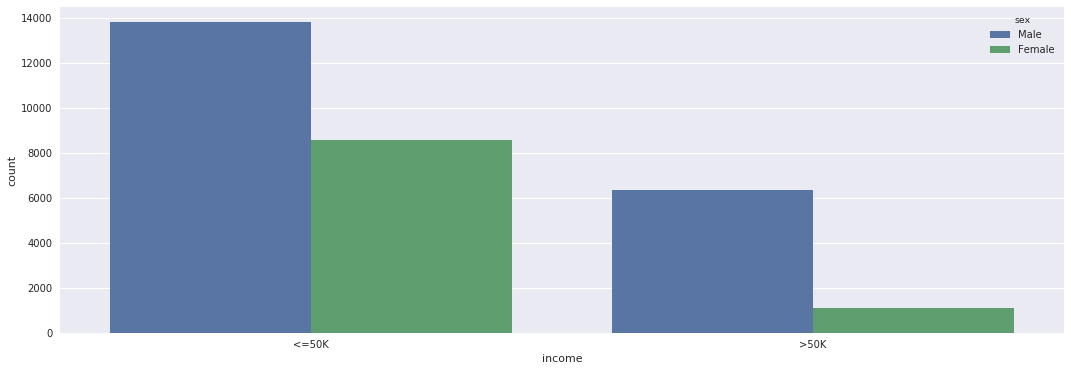

In [76]:
sns.countplot(x='income', hue='sex', data=df)

In [77]:
# Expected Result:

### Exercise: Create a bar plot showing count of `race`s

It should look like this:

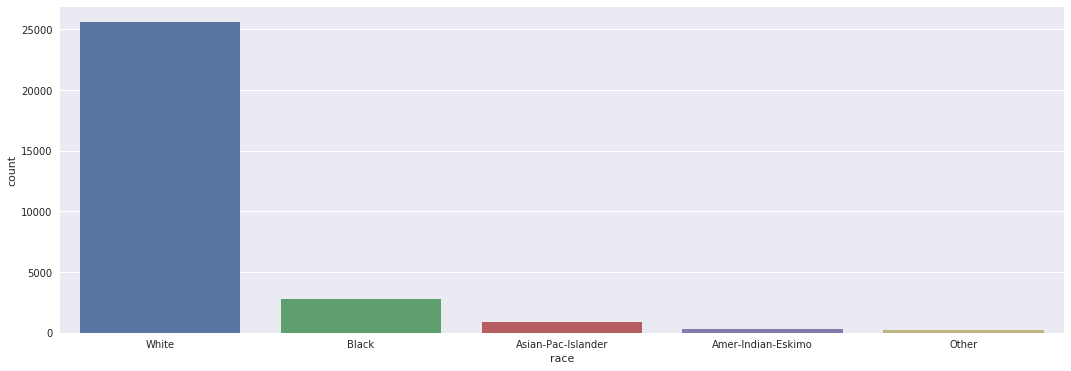

In [78]:
sns.countplot(x='race', data=df)

In [79]:
# Expected result

### Exercise: Count per `race`

Using grouping and aggregation functions, count how many people are per each race:

In [80]:
df.groupby('race')['age'].count()

race
Amer-Indian-Eskimo      284
Asian-Pac-Islander      882
Black                  2792
Other                   230
White                 25590
Name: age, dtype: int64

In [81]:
# Expected result:

### Exercise: Create a barplot with the `occupation` column

We want to check the number of people for each `occupation`. In this case, we want to see a nice, sorted plot like this one:

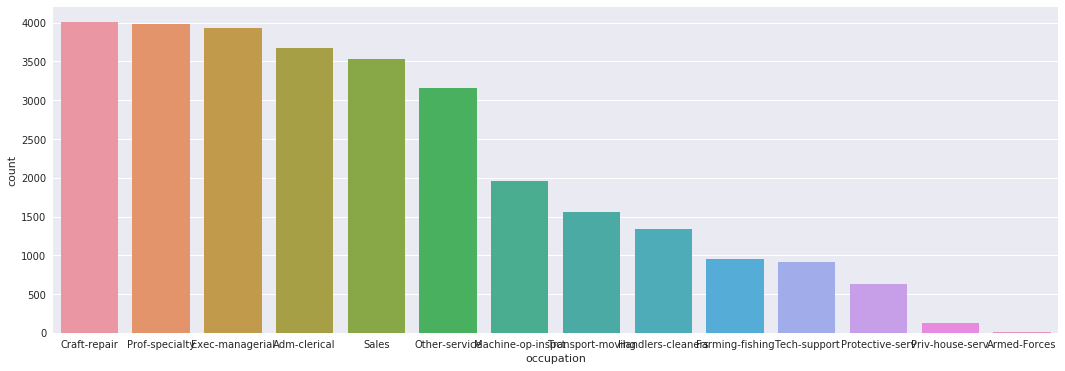

In [82]:
sns.countplot(x=df['occupation'], data=df, order=df['occupation'].value_counts().index)

In [83]:
# Expected result:

### Exercise: Count per `occupation`

Using grouping and aggregation functions, count how many people are per each occupation:

In [84]:
df.groupby('occupation')['age'].count().sort_index()

occupation
Adm-clerical         3678
Armed-Forces            9
Craft-repair         4007
Exec-managerial      3929
Farming-fishing       958
Handlers-cleaners    1341
Machine-op-inspct    1956
Other-service        3160
Priv-house-serv       129
Prof-specialty       3983
Protective-serv       630
Sales                3529
Tech-support          909
Transport-moving     1560
Name: age, dtype: int64

In [85]:
# Expected output

### Exercise: Display capital gains per occupation

Capital gain is defined as _"income from investment sources, apart from wages/salary"_, is basically people generating profits from investments out of their regular job. Show the **average** capital gain per occupation. It should look something like this:

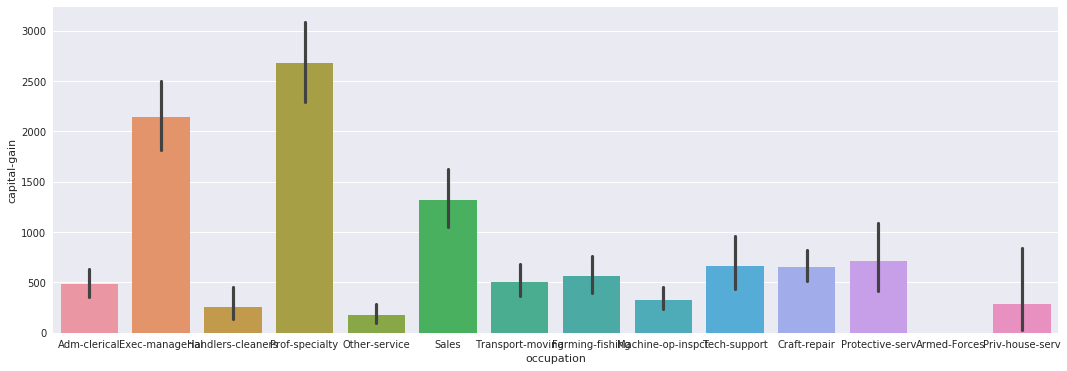

In [86]:
sns.barplot(x='occupation', y='capital-gain', data=df)

In [87]:
# Expected result:

### Exercise: Use grouping to obtain the same results as the previous plot

Using grouping functions, generate the same results as the plot above. Expected output:

In [88]:
df.groupby('occupation')['capital-gain'].mean()

occupation
Adm-clerical          484.934203
Armed-Forces            0.000000
Craft-repair          652.153731
Exec-managerial      2142.508526
Farming-fishing       559.720251
Handlers-cleaners     258.532438
Machine-op-inspct     323.501022
Other-service         177.340823
Priv-house-serv       284.279070
Prof-specialty       2683.180015
Protective-serv       710.965079
Sales                1315.239161
Tech-support          664.147415
Transport-moving      501.953205
Name: capital-gain, dtype: float64

In [89]:
# Expected result

### Exercise: Bar plot: average capital gain per race and group

Create a bar plot that shows in that has `race` as the X axis, a `sex` hue and displays the average capital gain for each group. Expected output:

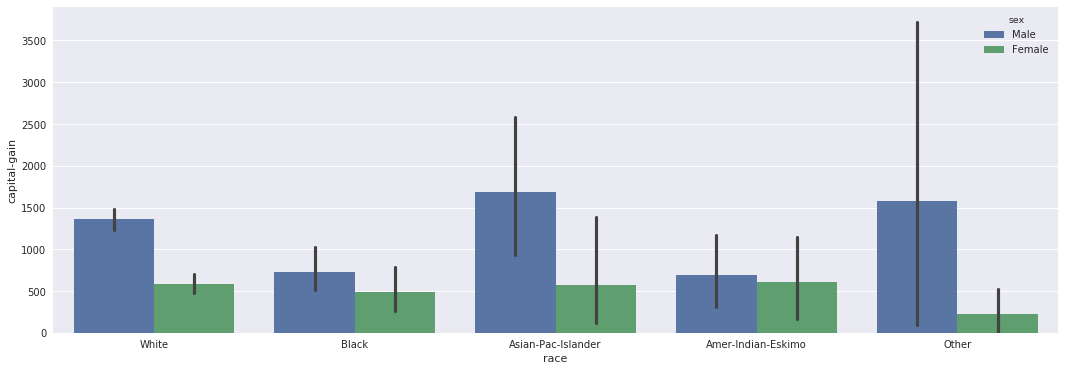

In [91]:
sns.barplot(x='race', y='capital-gain', hue='sex', data=df)

In [90]:
# Expected output

### Exercise: Use grouping to obtain the same results as the previous plot

Use group functions to generate the values plotted above. You're basically grouping by `race` and `sex` and computing the average capital gain per group.

In [94]:
df.groupby('race','sex')['capital-gain'].mean()

ValueError: No axis named sex for object type <class 'pandas.core.frame.DataFrame'>

In [92]:
# Expected output

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)